# Diversity Measures

Based on "**Achieving Diversity in Counterfactual Explanations: a Review and Discussion**"

 by **Thibault Laugel and Adulam Jeyasothy et al.**

| Diversity Type          | Metric or Criterion               | Examples from Literature         |
|--------------------------|------------------------------------|-----------------------------------|
| **Criteria Diversity**   | Pareto spread, objective variance | Dandl et al. (2020), CARE (2022) |
| **Feature Diversity**    | \( l_0 \), \( l_2 \), cosine distance | Mothilal et al. (2020), DiVE (2021) |
| **Action Diversity**     | Jaccard distance, direction count | Russell (2019), Guidotti et al. (2019) |
| **Optimization Diversity** | Randomization, clustering         | CERTIFAI (2020), GeCo (2021)     |
| **Mixed Diversity (All Types)** | Custom definitions          | Tsirtsis et al. (2021), DECE (2020) |

### Pareto Spread
- **Definition**: Measures the spread of solutions along the Pareto front in multi-objective optimization.
- **Formula**:
  $$
  \text{Pareto Spread} = \sqrt{\sum_{i=1}^{k} \| f(e_i) - \bar{f} \|_2^2}
  $$
  Where:
  - $ f(e_i) $: Vector of objective values for the $i$-th counterfactual.
  - $ \bar{f} $: Centroid of the Pareto front (average of $ f(e_i) $).
  - $ k $: Number of counterfactuals.

This metric captures how far the solutions are distributed across the Pareto front.

---

### Objective Variance
- **Definition**: Quantifies the variability of individual objectives across a set of counterfactuals.
- **Formula**:
  $$
  \text{Objective Variance} = \frac{1}{k} \sum_{j=1}^{m} \text{Var}([f_j(e_1), f_j(e_2), \dots, f_j(e_k)])
  $$
  Where:
  - $ m $: Number of objectives.
  - $ f_j(e_i) $: Value of the $j$-th objective for the $i$-th counterfactual.
  - $ \text{Var} $: Variance function.

This metric evaluates how well the objectives differ across the generated counterfactuals.

---

Both metrics focus on diversity in the trade-offs between objectives, with Pareto Spread assessing distribution and Objective Variance quantifying variability.


# Method Experiments

### Objective Function

Given:
- $ \mathbf{x}' \sim p_{dist}(\mathbf{x}', \mathbf{x}) = \frac{1}{\lambda \|\mathbf{x} - \mathbf{x}'\|_2^2} $: Target variable (Counterfactual Explanation).
- $ \mathbf{x} \in \mathbb{R}^d $: Conditional variable (Data Point).
- $ p_\theta(\mathbf{x}' | \mathbf{x}) $: Conditional density modeled by the flow.

The optimization objective:
$$
\mathcal{L}(\theta) = - \log p_\theta(f_\theta(\mathbf{x}, \mathbf{x}')) - \log \left| \det \frac{\partial f_\theta(\mathbf{x}, \mathbf{x}')}{\partial \mathbf{x}} \right|
$$

### Optimization Problem

$$
\theta^* = \arg\min_\theta \mathcal{L}(\theta).
$$

### Components
1. **Conditional Log-Likelihood**:
   $$
   -\log p_\theta(\mathbf{x} | \mathbf{x}').
   $$
2. **Regularization**: 
   $$
   \lambda \|\mathbf{x} - \mathbf{x}'\|_2^2.
   $$
3. **Trade-off**: Controlled by $ \lambda $.


# Method results
| **Dataset** | **Method** | **Coverage ↑** | **Validity ↑** | **Prob. Plaus. ↑** | **LOF** | **IsoForest** | **Log Dens. ↑** | **L1 ↓** | **L2 ↓** | **Time ↓** |
|-------------|------------|---------------|---------------|-------------------|---------|--------------|----------------|---------|---------|-----------|
| **Moons**   | CBCE       | 1.00          | 1.00          | 0.10              | 1.06    | 0.03         | -5.81          | 0.62    | 0.48    | 0.07 s     |
|             | CEGP       | 1.00          | 1.00          | 0.09              | 1.36    | 0.00         | -6.66          | 0.36    | 0.28    | 904.11 s   |
|             | CEM        | 1.00          | 1.00          | 0.14              | 2.03    | -0.07        | -10.09         | 0.55    | 0.50    | 211.56 s   |
|             | WACH       | 0.98          | 1.00          | 0.11              | 1.55    | -0.01        | -6.34          | 0.36    | 0.36    | 198.29 s   |
|             | ARTELT     | 1.00          | 1.00          | 0.08              | 1.53    | -0.03        | -8.74          | 0.32    | 0.32    | 4.15 s     |
|             | PPCEF      | 1.00          | 1.00          | 1.00              | 1.01    | 0.04         | 1.69           | 0.45    | 0.36    | 1.85 s     |
|             | GenCE      | **1.0000 ± 0.0000** | **0.9239 ± 0.0173** | **0.4560 ± 0.0271** | **1.0991 ± 0.0089** | **0.0158 ± 0.0017** | **0.7627 ± 0.1422** | **0.4330 ± 0.0139** | **0.3403 ± 0.0103** | **-**        |



---
.
| **Dataset** | **Method** | **Coverage ↑** | **Validity ↑** | **Prob. Plaus. ↑** | **LOF** | **IsoForest** | **Log Dens. ↑** | **L1 ↓** | **L2 ↓** | **Time ↓** |
|-------------|------------|---------------|---------------|-------------------|---------|--------------|----------------|---------|---------|-----------|
| **Law**     | CBCE       | 1.00          | 1.00          | 0.49              | 1.05    | 0.04         | 1.28           | 0.61    | 0.40    | 0.23 s     |
|             | CEGP       | 1.00          | 1.00          | 0.49              | 1.07    | 0.02         | 1.08           | 0.23    | 0.18    | 1973.76 s  |
|             | CEM        | 1.00          | 1.00          | 0.26              | 1.26    | -0.02        | -0.56          | 0.33    | 0.31    | 368.10 s   |
|             | WACH       | 1.00          | 1.00          | 0.39              | 1.30    | -0.01        | -0.13          | 0.45    | 0.35    | 359.00 s   |
|             | ARTELT     | 1.00          | 1.00          | 0.40              | 1.12    | 0.02         | -0.54          | 0.20    | 0.20    | 0.42 s     |
|             | PPCEF      | 1.00          | 1.00          | 1.00              | 1.03    | 0.07         | 2.05           | 0.37    | 0.23    | 2.42 s     |
|             | GenCE      | **1.0000 ± 0.0000** | **0.7306 ± 0.0189** | **0.7499 ± 0.0207** | **1.0443 ± 0.0039** | **0.0503 ± 0.0017** | **1.5886 ± 0.0439** | **0.5388 ± 0.0096** | **0.3487 ± 0.0057** | **-**        |



---
.
| **Dataset** | **Method** | **Coverage ↑** | **Validity ↑** | **Prob. Plaus. ↑** | **LOF** | **IsoForest** | **Log Dens. ↑** | **L1 ↓** | **L2 ↓** | **Time ↓** |
|-------------|------------|---------------|---------------|-------------------|---------|--------------|----------------|---------|---------|-----------|
| **Audit**   | CBCE       | **1.00**      | **1.00**      | 0.79              | 11.70   | 0.14         | **54.97**      | 2.55    | 1.24    | **0.04 s** |
|             | CEGP       | 0.97          | **1.00**      | 0.26              | 6.08·10⁷| 0.06         | 8.09           | 1.65    | 0.67    | 561.04 s   |
|             | CEM        | 0.52          | **1.00**      | 0.01              | 8.28·10⁶| -0.04        | 10.24          | **0.37**| **0.37**| 105.92 s   |
|             | WACH       | **0.99**      | **1.00**      | 0.02              | 1.42·10⁸| 0.06         | -40.34         | 1.78    | 0.80    | 101.27 s   |
|             | ARTELT     | 0.60          | 0.97          | 0.00              | 4.09·10⁸| 0.10         | -3585.76       | **0.90**| 0.88    | 43.84 s    |
|             | PPCEF      | **1.00**      | **0.99**      | **0.99**          | 4.25·10⁷| 0.08         | 51.64          | 2.04    | 0.79    | 7.01 s     |
|             | GenCE      | **1.0000 ± 0.0000** | **0.8306 ± 0.0189** | | **4.48·10⁷** | **0.1443 ± 0.0039** | **41.588 ± 0.043** | **2.038 ± 0.001** | **0.858 ± 0.005** | **-**        |


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from matplotlib import cm
from torch.utils.data import DataLoader, Dataset


from counterfactuals.datasets import LawDataset, MoonsDataset
from counterfactuals.generative_models import MaskedAutoregressiveFlowDistance as MaskedAutoregressiveFlow
from counterfactuals.discriminative_models import (
    LogisticRegression,
    MultilayerPerceptron,
)
from counterfactuals.metrics import CFMetrics

In [3]:
class PairDistanceDataset(Dataset):
    def __init__(self, class_zero, class_one, length=None):
        """
        Initialize with two arrays, one for each class.
        """
        self.length = length
        self.class_zero = torch.tensor(class_zero, dtype=torch.float32)
        self.class_one = torch.tensor(class_one, dtype=torch.float32)

        # Calculate pairwise distances between zero and one classes
        self.zero_one_distance = torch.cdist(self.class_zero, self.class_one) ** 4

        self.size_zero = class_zero.shape[0]
        self.size_one = class_one.shape[0]

    def __len__(self):
        # The total combinations are len(class_zero) * len(class_one)
        if self.length is not None:
            return self.length
        return self.size_zero * self.size_one

    def get_specific_item(self, idx):
        """
        Get the specific item based on the index.
        Sample the second point based on the distance weight from another class.
        """
        if idx < self.size_zero:
            i = idx
            x_orig = self.class_zero[i]

            # Calculate weights for sampling y
            zero_one_weight = 1 / self.zero_one_distance[i]
            zero_one_weight /= zero_one_weight.sum()

            j = torch.multinomial(zero_one_weight, num_samples=1).item()
            x_cf = self.class_one[j]
        else:
            i = idx + self.size_zero
            x_orig = self.class_one[i]

            # Calculate weights for sampling y
            zero_one_weight = 1 / self.zero_one_distance[:, i]
            zero_one_weight /= zero_one_weight.sum()

            j = torch.multinomial(zero_one_weight, num_samples=1).item()
            x_cf = self.class_zero[j]
        return torch.tensor(x_cf, dtype=torch.float32), torch.tensor(
            x_orig, dtype=torch.float32
        )

    def __getitem__(self, idx):
        """
        Randomly select a point from one class.
        Sample the second point based on the distance weight from another class.
        """
        if torch.rand(1) > 0.5:
            i = torch.randint(0, self.size_zero, (1,)).item()
            x_orig = self.class_zero[i]

            # Calculate weights for sampling y
            zero_one_weight = 1 / self.zero_one_distance[i]
            zero_one_weight /= zero_one_weight.sum()

            j = torch.multinomial(zero_one_weight, num_samples=1).item()
            x_cf = self.class_one[j]
        else:
            i = torch.randint(0, self.size_one, (1,)).item()
            x_orig = self.class_one[i]

            # Calculate weights for sampling y
            zero_one_weight = 1 / self.zero_one_distance[:, i]
            zero_one_weight /= zero_one_weight.sum()

            j = torch.multinomial(zero_one_weight, num_samples=1).item()
            x_cf = self.class_zero[j]
        return torch.tensor(x_cf, dtype=torch.float32), torch.tensor(
            x_orig, dtype=torch.float32
        )

In [4]:
# class PairDistanceDensityDataset(Dataset):
#     def __init__(self, class_zero, class_one, gen_model: BaseGenModel, length=None):
#         """
#         Initialize with two arrays, one for each class.
#         """
#         self.length = length
#         self.gen_model = gen_model
#         self.class_zero = torch.tensor(class_zero, dtype=torch.float32)
#         self.class_one = torch.tensor(class_one, dtype=torch.float32)

#         # Calculate pairwise distances between zero and one classes
#         self.zero_one_distance = torch.cdist(self.class_zero, self.class_one) ** 4
#         self.zero_log_likelihood = self.gen_model(
#             class_zero, torch.zeros(class_zero.shape[0])
#         ).exp()
#         self.one_log_likelihood = self.gen_model(
#             class_one, torch.ones(class_one.shape[0])
#         ).exp()

#         self.size_zero = class_zero.shape[0]
#         self.size_one = class_one.shape[0]

#     def __len__(self):
#         # The total combinations are len(class_zero) * len(class_one)
#         if self.length is not None:
#             return self.length
#         return self.size_zero * self.size_one

#     def __getitem__(self, idx):
#         """
#         Randomly select a point from one class.
#         Sample the second point based on the distance weight from another class.
#         """
#         if torch.rand(1) > 0.5:
#             i = torch.randint(0, self.size_zero, (1,)).item()
#             x_orig = self.class_zero[i]

#             # Calculate weights for sampling y
#             zero_one_weight = (1 / self.zero_one_distance[i]) + self.one_log_likelihood
#             zero_one_weight /= zero_one_weight.sum()

#             j = torch.multinomial(zero_one_weight, num_samples=1).item()
#             x_cf = self.class_one[j]
#         else:
#             i = torch.randint(0, self.size_one, (1,)).item()
#             x_orig = self.class_one[i]

#             # Calculate weights for sampling y
#             zero_one_weight = (
#                 1 / self.zero_one_distance[:, i] + self.zero_log_likelihood
#             )
#             zero_one_weight /= zero_one_weight.sum()

#             j = torch.multinomial(zero_one_weight, num_samples=1).item()
#             x_cf = self.class_zero[j]
#         return torch.tensor(x_cf, dtype=torch.float32), torch.tensor(
#             x_orig, dtype=torch.float32
#         )

In [5]:
from counterfactuals.datasets import SyntheticDataset

# dataset = MoonsDataset(file_path="../../data/moons.csv")
# dataset = LawDataset(file_path="../../data/law.csv")
dataset = SyntheticDataset(random_seed=55)

In [6]:
from counterfactuals.generative_models import MaskedAutoregressiveFlow as baseMAF

flow_train_dataloader = dataset.train_dataloader(
    batch_size=128, shuffle=True, noise_lvl=0.03
)
flow_test_dataloader = dataset.test_dataloader(batch_size=128, shuffle=False)
flow = baseMAF(
    features=dataset.X_test.shape[1],
    hidden_features=16,
    num_blocks_per_layer=4,
    num_layers=8,
    context_features=1,
)
flow.fit(flow_train_dataloader, flow_test_dataloader, num_epochs=1000, patience=50)

Epoch 78, Train: -3.0098, test: -0.7470, patience: 50:   8%|▊         | 78/1000 [00:31<06:18,  2.44it/s]


In [7]:
disc_model = LogisticRegression(input_size=2, target_size=1)
train_dataloader = dataset.train_dataloader(batch_size=256, shuffle=True, noise_lvl=0.0)
test_dataloader = dataset.test_dataloader(batch_size=256, shuffle=False)
disc_model.fit(train_dataloader, test_dataloader, epochs=10000, patience=300, lr=1e-3)

Epoch 1979, Train: 0.6420, test: 0.6249, patience: 300:  20%|█▉        | 1979/10000 [00:50<03:22, 39.54it/s]


In [8]:
disc_model = MultilayerPerceptron(
    input_size=2, hidden_layer_sizes=[256, 256], target_size=1, dropout=0.2
)
train_dataloader = dataset.train_dataloader(batch_size=64, shuffle=True, noise_lvl=0.0)
test_dataloader = dataset.test_dataloader(batch_size=64, shuffle=False)
disc_model.fit(train_dataloader, test_dataloader, epochs=10000, patience=100, lr=1e-3)
# validate
y_pred = disc_model.predict(dataset.X_test).detach().numpy()
y_true = dataset.y_test
print(f"Accuracy: {np.mean(y_pred == y_true)}")
# disc_model.load("../models/MoonsDataset/disc_model_MultilayerPerceptron.pt")

disc_model.eval()
dataset.y_train = disc_model.predict(dataset.X_train).detach().numpy()
dataset.y_test = disc_model.predict(dataset.X_test).detach().numpy()

Epoch 286, Train: 0.3776, test: 0.4142, patience: 100:   3%|▎         | 287/10000 [00:24<13:56, 11.61it/s]

Accuracy: 0.815


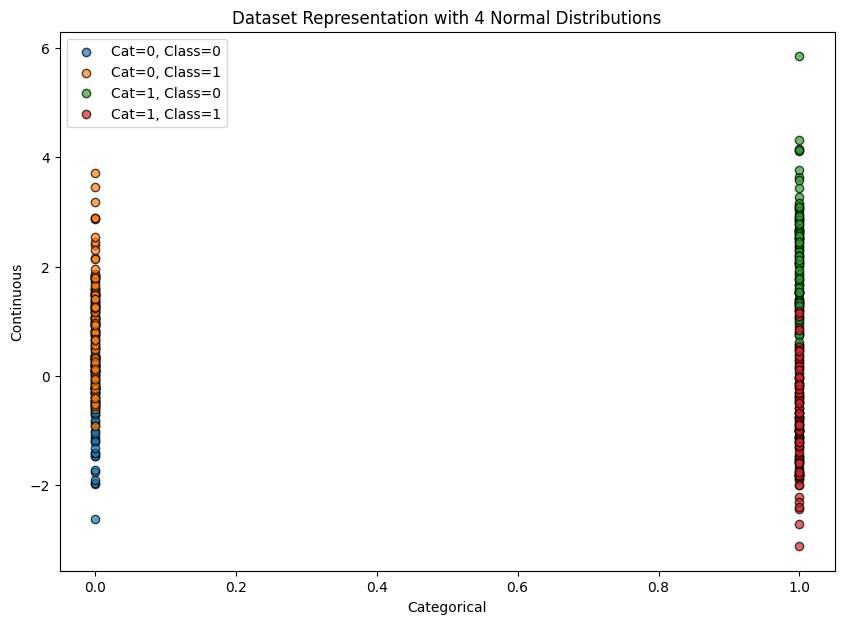

In [9]:
import matplotlib.pyplot as plt

# Generate dataset
generator = SyntheticDataset(n_samples=100, random_seed=42)
data = generator.generate_data()

# Separate by class and category
categories = [0, 1]
classes = [0, 1]

fig, ax = plt.subplots(figsize=(10, 7))

# Plot data for each combination of category and class
for cat in categories:
    for cls in classes:
        subset = data[(data['categorical'] == cat) & (data['class'] == cls)]
        ax.scatter(
            subset['categorical'],
            subset['continuous'],
            label=f'Cat={cat}, Class={cls}',
            alpha=0.7,
            edgecolor='k'
        )

# Labels, legend, and title
ax.set_xlabel('Categorical')
ax.set_ylabel('Continuous')
ax.set_title('Dataset Representation with 4 Normal Distributions')
ax.legend()
plt.show()


# PairDistanceDataset

In [10]:
class_zero = dataset.X_train[dataset.y_train == 0]
class_one = dataset.X_train[dataset.y_train == 1]

pair_dataset_train = PairDistanceDataset(class_zero, class_one, length=5000)


def collate_fn(batch):
    X, y = zip(*batch)
    X = torch.stack(X)
    y = torch.stack(y)
    noise = torch.randn_like(X) * 0.03
    noise = torch.randn_like(y) * 0.03
    X = X + noise
    y = y + noise
    return X, y


train_dataloader = DataLoader(
    pair_dataset_train, batch_size=256, shuffle=True, collate_fn=collate_fn
)
train_dataloader = DataLoader(pair_dataset_train, batch_size=128, shuffle=True)


/var/folders/k_/2tytwy6d2ll1_kvk_k0j7vd00000gn/T/ipykernel_2635/430920865.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(x_cf, dtype=torch.float32), torch.tensor(


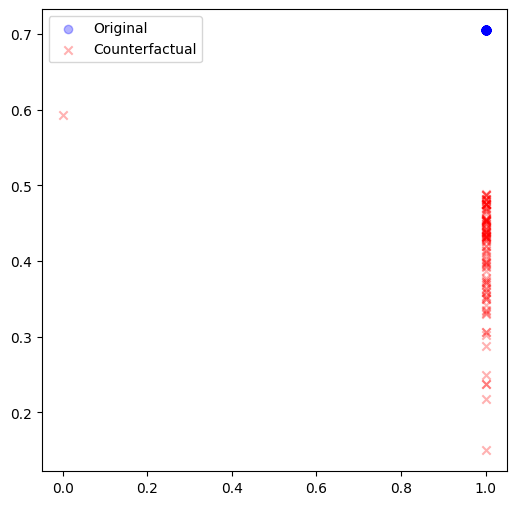

In [11]:
x_cfs, x_origs = [], []
for i in range(100):
    x_cf, x_orig = pair_dataset_train.get_specific_item(253)
    x_cfs.append(x_cf)
    x_origs.append(x_orig)
x_cfs = torch.vstack(x_cfs)
x_origs = torch.vstack(x_origs)

plt.figure(figsize=(6, 6))
plt.scatter(x_origs[:, 0], x_origs[:, 1], c='blue', marker='o', label='Original', alpha=0.3)
plt.scatter(x_cfs[:, 0], x_cfs[:, 1], c='red', marker='x', label='Counterfactual', alpha=0.3)
plt.legend()

In [12]:
class_zero = dataset.X_test[dataset.y_test == 0]
class_one = dataset.X_test[dataset.y_test == 1]

pair_dataset_test = PairDistanceDataset(class_zero, class_one)

test_dataloader = DataLoader(pair_dataset_test, batch_size=2048, shuffle=False)

In [13]:
cf = MaskedAutoregressiveFlow(
    features=dataset.X_test.shape[1],
    hidden_features=16,
    num_blocks_per_layer=2,
    num_layers=2,
    context_features=dataset.X_test.shape[1],
)
cf.fit(
    train_dataloader, test_dataloader, num_epochs=1000, learning_rate=1e-3, patience=100, lambda_dist=0.2, checkpoint_path="best_cf_model_syntetic_dist_0.2.pt"
)
cf.load("best_cf_model_syntetic_dist_0.2.pt")

  0%|          | 0/1000 [00:00<?, ?it/s]/var/folders/k_/2tytwy6d2ll1_kvk_k0j7vd00000gn/T/ipykernel_2635/430920865.py:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(x_cf, dtype=torch.float32), torch.tensor(
Epoch 804, Train: -6.3784, Test: -6.0999, Patience: 100:  80%|████████  | 804/1000 [1:28:39<21:36,  6.62s/it] 


In [14]:
from counterfactuals.plot_utils import plot_generative_model_distribution

/Users/apple/anaconda3/envs/counterfactuals/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


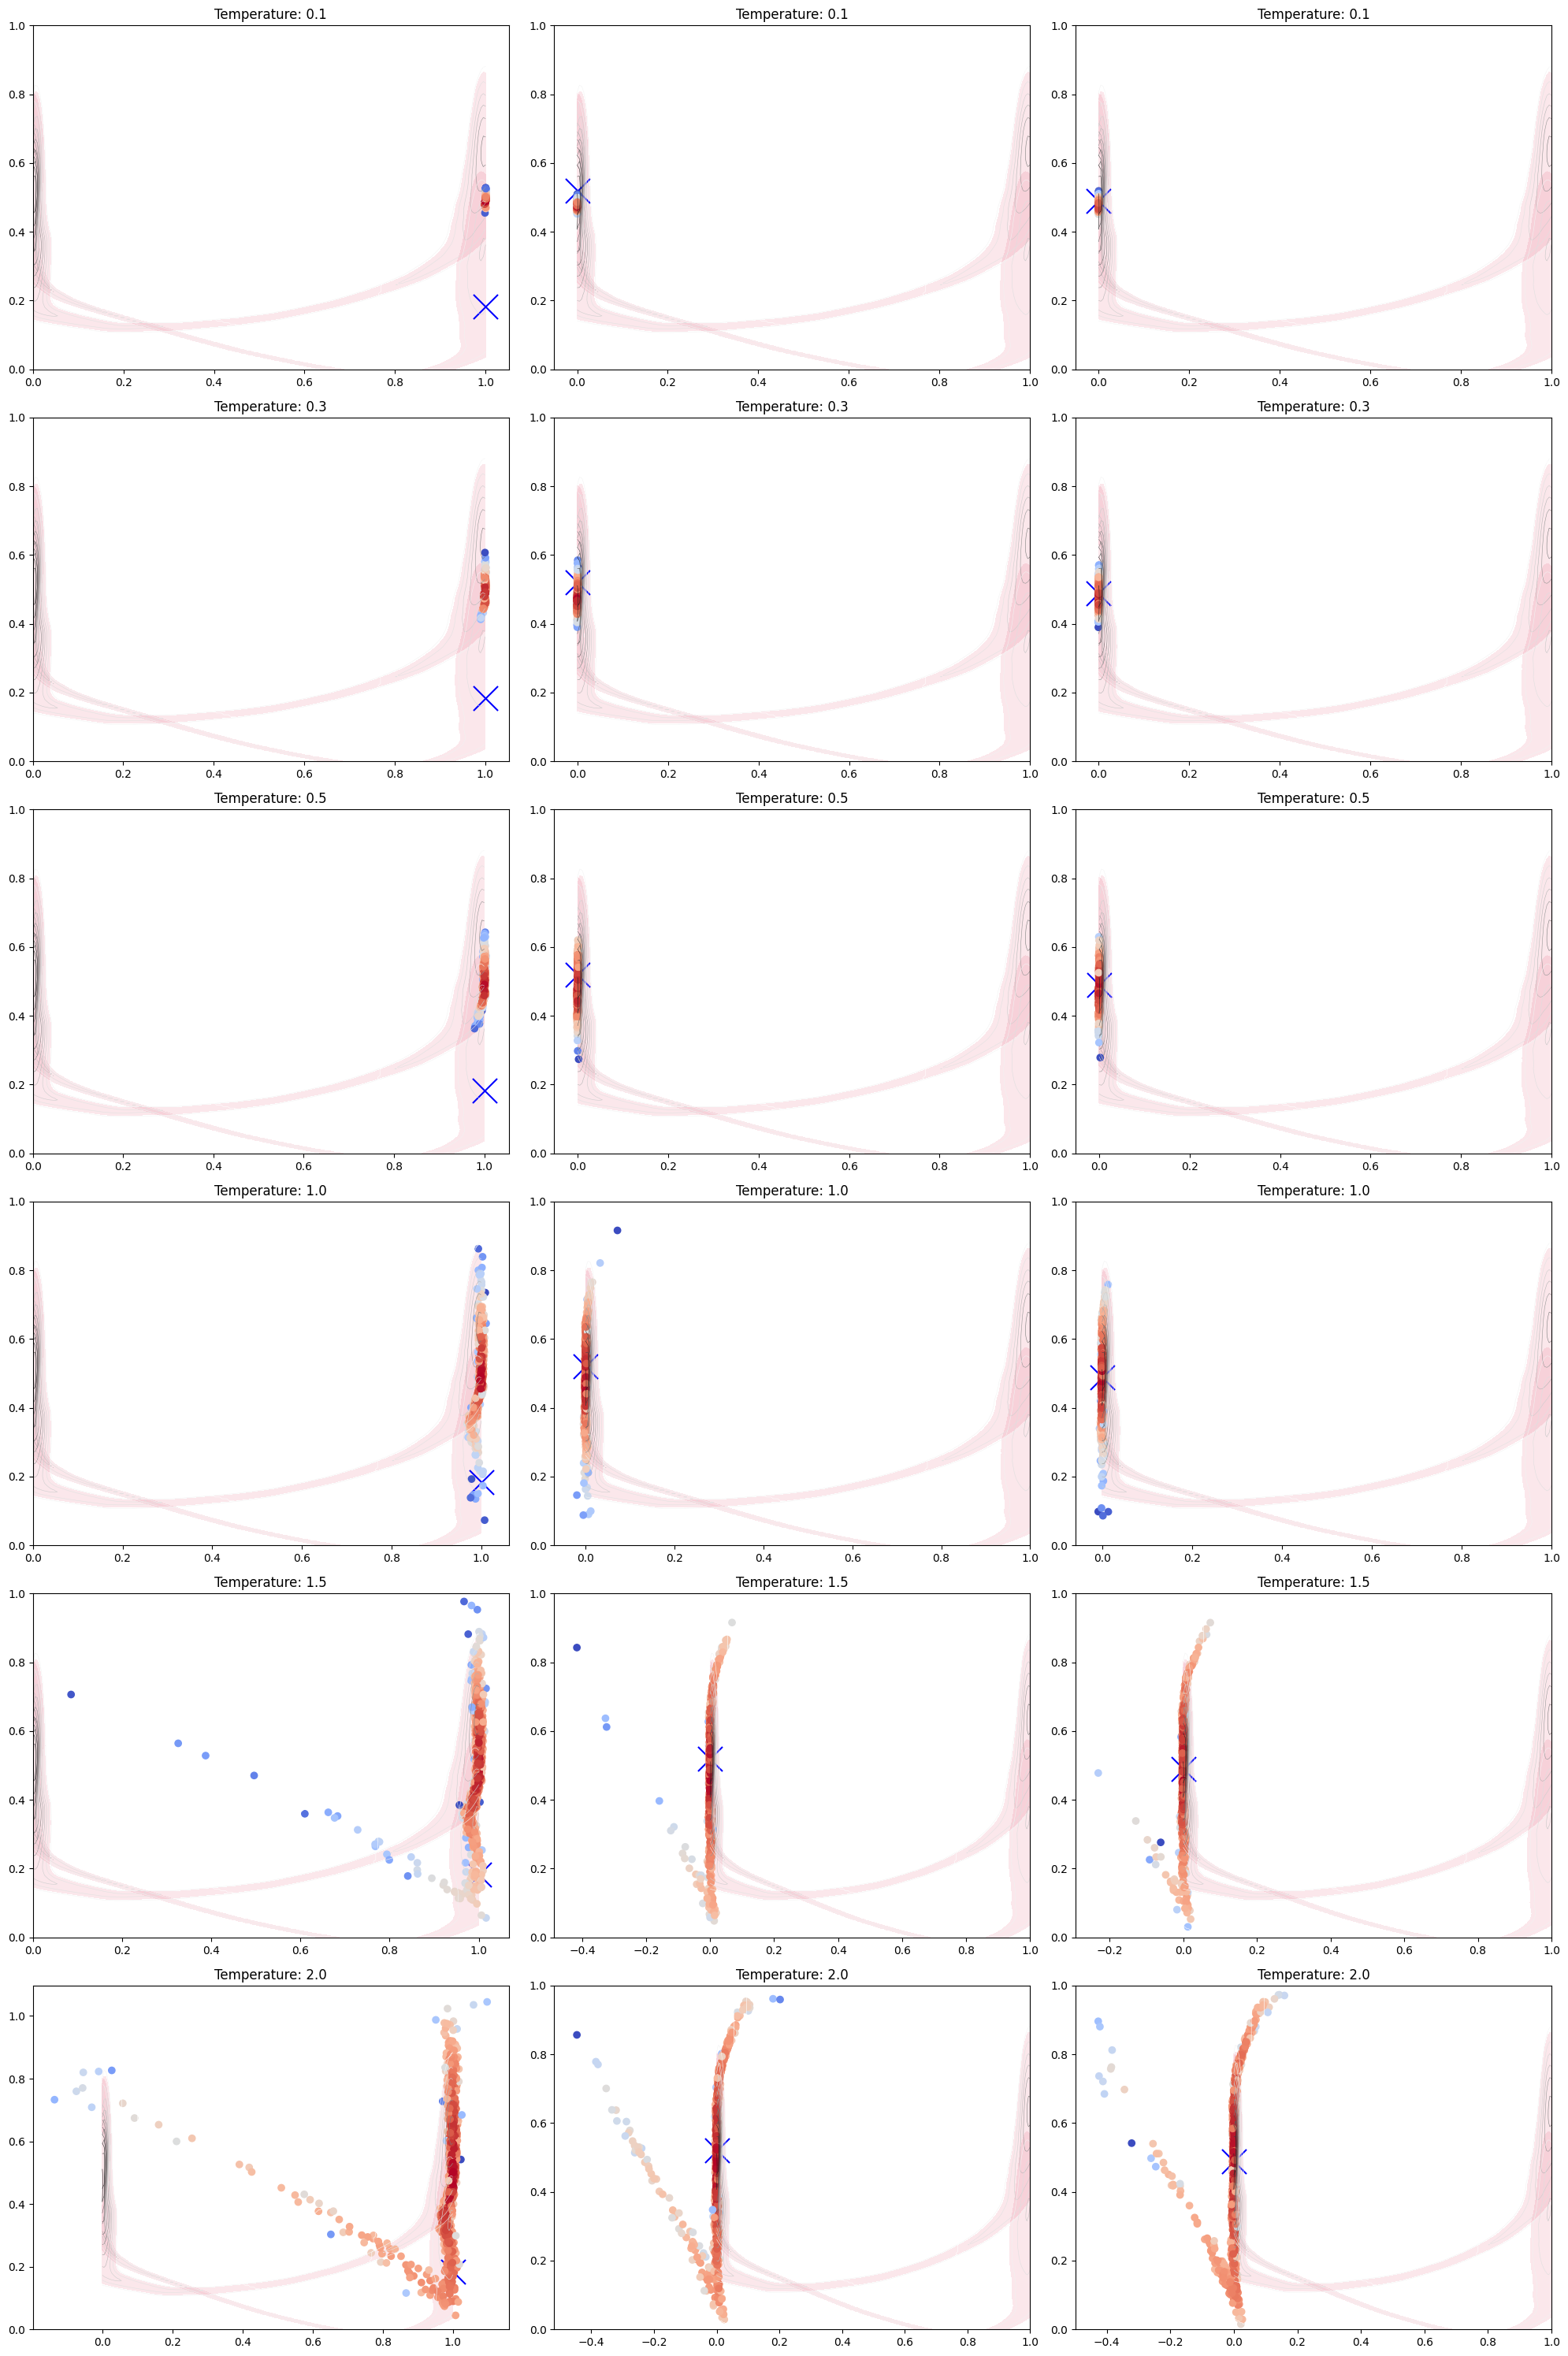

In [15]:
fig, ax = plt.subplots(6, 3, figsize=(20, 30))

for t_i, t in enumerate([0.1, 0.3, 0.5, 1.0, 1.5, 2.0]):
    for i_i, i in enumerate(range(54, 57)):
        with torch.no_grad():
            points, log_prob = cf.sample_and_log_prob(
                1000, context=torch.from_numpy(np.array([class_one[i]])), temp=t
            )

        points = points.squeeze().numpy()
        plot_generative_model_distribution(ax[t_i, i_i], flow, 1.2, torch.Tensor([0]))
        plot_generative_model_distribution(ax[t_i, i_i], flow, 1.2, torch.Tensor([1]))
        ax[t_i, i_i].scatter(
            class_one[i, 0],
            class_one[i, 1],
            c="blue",
            s=500,
            marker="x",
            label="Original",
        )
        ax[t_i, i_i].scatter(
            points[:, 0],
            points[:, 1],
            c=log_prob,
            cmap=cm.coolwarm,
            label="Counterfactuals",
        )
        ax[t_i, i_i].set_title(f"Temperature: {t}")

plt.tight_layout()
plt.show()

/var/folders/k_/2tytwy6d2ll1_kvk_k0j7vd00000gn/T/ipykernel_2635/2560437875.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  ax[0], cf, None, torch.Tensor([class_zero[i]]), contourf=True
/Users/apple/Projects/counterfactuals/counterfactuals/plot_utils.py:31: UserWarning: linewidths is ignored by contourf
  _ = plot_func(


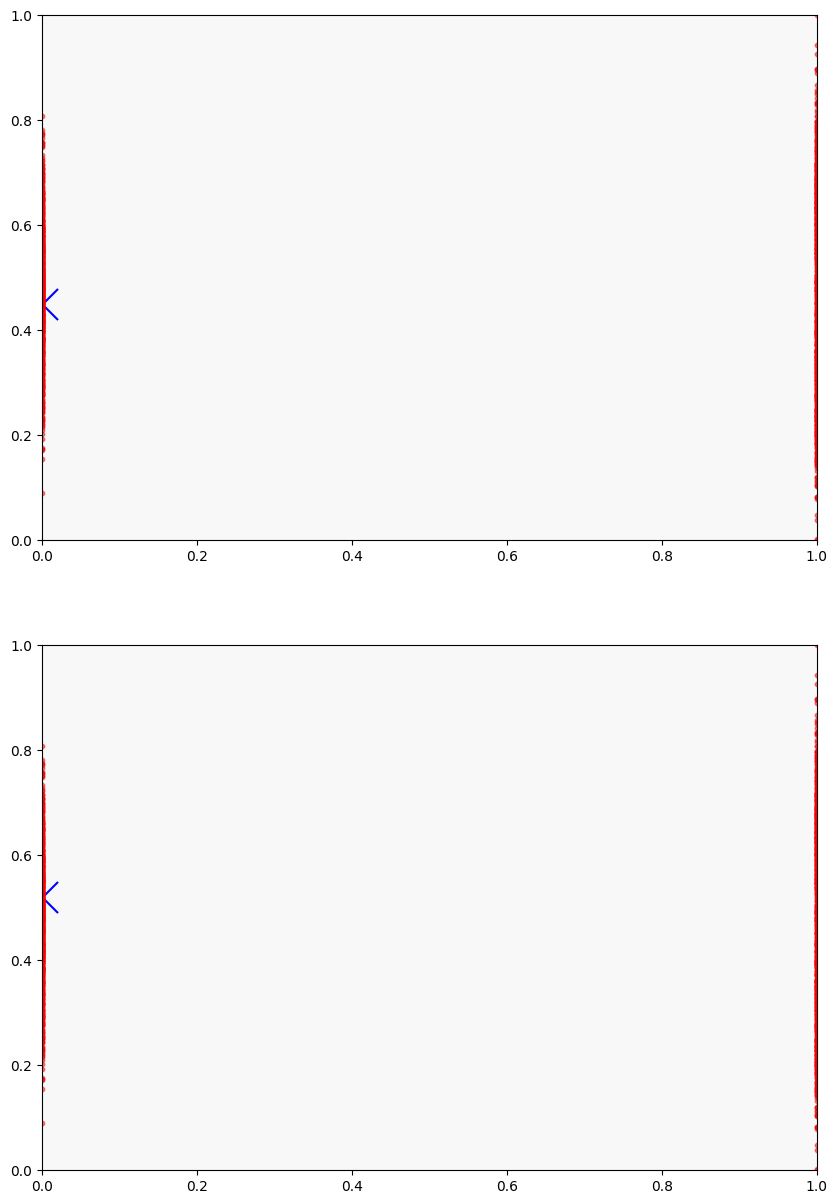

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(10, 15))

i = 52
with torch.no_grad():
    points, log_prob = cf.sample_and_log_prob(
        1000, context=torch.from_numpy(np.array([class_zero[i]])), temp=1.0
    )
points = points.squeeze().numpy()
plot_generative_model_distribution(
    ax[0], cf, None, torch.Tensor([class_zero[i]]), contourf=True
)
ax[0].scatter(class_zero[i, 0], class_zero[i, 1], c="blue", marker="x", s=500)
ax[0].scatter(
    pair_dataset_train.class_one[:, 0],
    pair_dataset_train.class_one[:, 1],
    c="red",
    s=10,
    alpha=0.5,
)
ax[0].scatter(
    pair_dataset_train.class_zero[:, 0],
    pair_dataset_train.class_zero[:, 1],
    c="red",
    s=10,
    alpha=0.5,
)

i = 55
with torch.no_grad():
    points, log_prob = cf.sample_and_log_prob(
        1000, context=torch.from_numpy(np.array([class_one[i]])), temp=1.0
    )
points = points.squeeze().numpy()
plot_generative_model_distribution(
    ax[1], cf, None, torch.Tensor([class_one[i]]), contourf=True
)
ax[1].scatter(class_one[i, 0], class_one[i, 1], c="blue", marker="x", s=500)
ax[1].scatter(
    pair_dataset_train.class_one[:, 0],
    pair_dataset_train.class_one[:, 1],
    c="red",
    s=10,
    alpha=0.5,
)
ax[1].scatter(
    pair_dataset_train.class_zero[:, 0],
    pair_dataset_train.class_zero[:, 1],
    c="red",
    s=10,
    alpha=0.5,
)

0. Poprawić wizualizacje.
1. Zwiększenie temperatury flow'a
2. Generacja z odfiltrowywaniem podobnych (+-)
3. Metryki z literatury + referencje innych metod
4. Metody referencyjne
5. Policzyć metryki które mamy dla par z losowaniem 1 punktu
6. Przetestować uczenie flow'a na kategorycznych

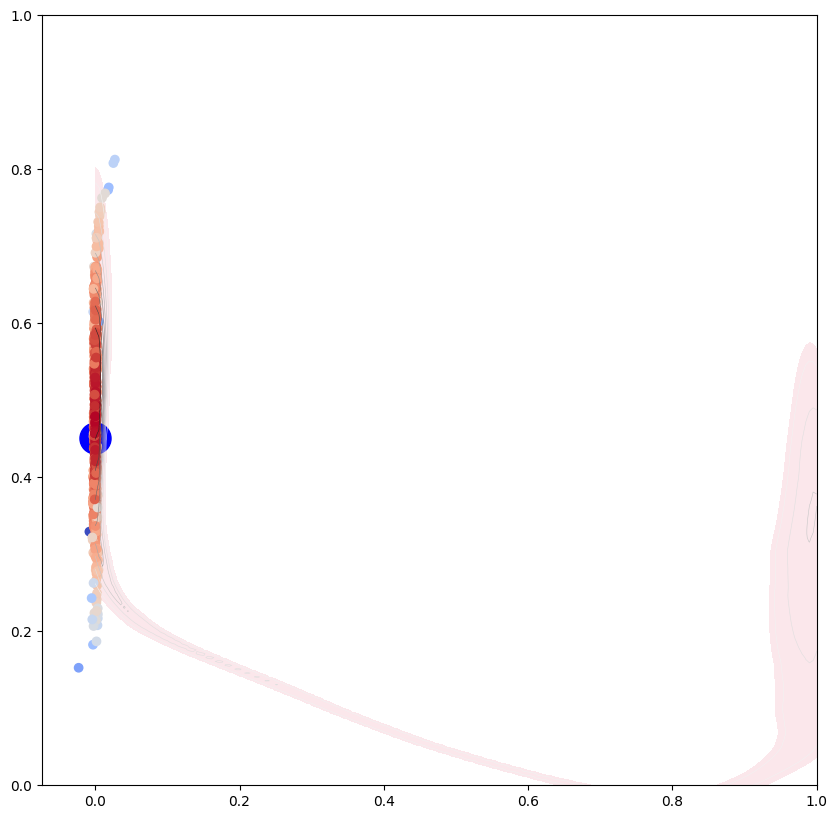

In [17]:
i = 1
with torch.no_grad():
    points, log_prob = cf.sample_and_log_prob(
        1000, context=torch.from_numpy(np.array([class_zero[i]]))
    )

points = points.squeeze().numpy()
# plot points with colorized log prob
fig, ax = plt.subplots(figsize=(10, 10))
# Convert context to a PyTorch tensor
context_tensor = torch.tensor([1.0], dtype=torch.float32)  # Replace 1.2 with desired context value
plot_generative_model_distribution(ax, flow, 1.2, context_tensor)  # Pass tensor as context
ax.scatter(class_zero[i, 0], class_zero[i, 1], c="blue", s=500)
ax.scatter(points[:, 0], points[:, 1], c=log_prob, cmap=cm.coolwarm)


In [18]:
cfs = []
with torch.no_grad():
    for x in dataset.X_test:
        points, log_prob = cf.sample_and_log_prob(
            100, context=torch.from_numpy(np.array([x]))
        )
        cfs.append(points)

# replace dims to 1,0,2
cfs = torch.stack(cfs).squeeze().permute(1, 0, 2).numpy()

In [19]:
for i in cfs:
    print(i.shape)
    break

(400, 2)


In [20]:
from tqdm import tqdm

cfs = []
with torch.no_grad():
    for x in dataset.X_test:
        points, log_prob = cf.sample_and_log_prob(
            100, context=torch.from_numpy(np.array([x]))
        )
        cfs.append(points)
cfs = torch.stack(cfs).squeeze().permute(1, 0, 2).numpy()

all_metrics = []
for i in tqdm(range(cfs.shape[0])):
    metrics = CFMetrics(
        X_cf=cfs[i],
        y_target=np.abs(dataset.y_test - 1),
        X_train=dataset.X_train,
        y_train=dataset.y_train,
        X_test=dataset.X_test,
        y_test=dataset.y_test,
        gen_model=flow,
        disc_model=disc_model,
        continuous_features=dataset.numerical_features,
        categorical_features=dataset.categorical_features,
        prob_plausibility_threshold=1.2,
    )

    all_metrics.append(metrics.calc_all_metrics())

# Calculate mean and standard deviation for each metric
mean_metrics = {key: np.mean([m[key] for m in all_metrics]) for key in all_metrics[0]}
std_metrics = {key: np.std([m[key] for m in all_metrics]) for key in all_metrics[0]}

# Print the results
for key in mean_metrics:
    print(f"{key}: {mean_metrics[key]:.4f} ± {std_metrics[key]:.4f}")

100%|██████████| 100/100 [01:44<00:00,  1.05s/it]

coverage: 1.0000 ± 0.0000
validity: 0.5347 ± 0.0238
actionability: 0.0000 ± 0.0000
sparsity: 1.0000 ± 0.0000
proximity_categorical_hamming: 0.6133 ± 0.0032
proximity_categorical_jaccard: 0.6133 ± 0.0032
proximity_continuous_manhattan: 0.6133 ± 0.0032
proximity_continuous_euclidean: 0.6133 ± 0.0032
proximity_continuous_mad: 1.4534 ± 0.0266
proximity_l2_jaccard: 0.6133 ± 0.0032
proximity_mad_hamming: 1.4534 ± 0.0266
prob_plausibility: 0.9271 ± 0.0122
log_density_cf: 2.4720 ± 0.1491
log_density_test: -1.2232 ± 0.0000
lof_scores_cf: 1.0773 ± 0.0212
lof_scores_test: 1.0536 ± 0.0000
isolation_forest_scores_cf: 0.0090 ± 0.0017
isolation_forest_scores_test: -0.0049 ± 0.0000


# PairDistanceDensityDataset

In [21]:
# class_zero = dataset.X_train[dataset.y_train == 0]
# class_one = dataset.X_train[dataset.y_train == 1]

# pair_dataset_train = PairDistanceDensityDataset(
#     torch.from_numpy(class_zero),
#     torch.from_numpy(class_one),
#     length=5000,
#     gen_model=flow,
# )


# def collate_fn(batch):
#     X, y = zip(*batch)
#     X = torch.stack(X)
#     y = torch.stack(y)
#     noise = torch.randn_like(X) * 0.03
#     noise = torch.randn_like(y) * 0.03
#     X = X + noise
#     y = y + noise
#     return X, y


# train_dataloader = DataLoader(
#     pair_dataset_train, batch_size=256, shuffle=True, collate_fn=collate_fn
# )

In [22]:
# x_cfs, x_origs = [], []
# for i in range(1000):
#     x_cf, x_orig = pair_dataset_train[5]
#     x_cfs.append(x_cf)
#     x_origs.append(x_orig)
# x_cfs = torch.vstack(x_cfs)
# x_origs = torch.vstack(x_origs)

# plt.figure(figsize=(6, 6))
# plt.scatter(
#     x_origs[:, 0], x_origs[:, 1], c="blue", marker="o", label="Original", alpha=0.3
# )
# plt.scatter(
#     x_cfs[:, 0], x_cfs[:, 1], c="red", marker="x", label="Counterfactual", alpha=0.3
# )
# plt.legend()

In [23]:
# class_zero = dataset.X_test[dataset.y_test == 0]
# class_one = dataset.X_test[dataset.y_test == 1]

# pair_dataset_test = PairDistanceDataset(class_zero, class_one)

# test_dataloader = DataLoader(pair_dataset_test, batch_size=2048, shuffle=False)

In [24]:
# cf = MaskedAutoregressiveFlow(
#     features=dataset.X_test.shape[1],
#     hidden_features=16,
#     num_blocks_per_layer=4,
#     num_layers=8,
#     context_features=2,
# )
# cf.fit(
#     train_dataloader, test_dataloader, num_epochs=1000, learning_rate=1e-3, patience=100
# )

In [25]:
# i = 3
# with torch.no_grad():
#     points, log_prob = cf.sample_and_log_prob(
#         1000, context=torch.from_numpy(np.array([class_one[i]]))
#     )

# points = points.squeeze().numpy()
# # plot points with colorized log prob
# # fig, ax = plt.figure(figsize=(10, 10))
# fig, ax = plt.subplots(figsize=(10, 10))
# plot_generative_model_distribution(ax, flow, 1.2, 2)
# ax.scatter(class_one[i, 0], class_one[i, 1], c="blue", s=500)
# ax.scatter(points[:, 0], points[:, 1], c=log_prob, cmap=cm.coolwarm)

In [26]:
# i = 1
# with torch.no_grad():
#     points, log_prob = cf.sample_and_log_prob(
#         1000, context=torch.from_numpy(np.array([class_zero[i]]))
#     )

# points = points.squeeze().numpy()
# # plot points with colorized log prob
# fig, ax = plt.subplots(figsize=(10, 10))
# plot_generative_model_distribution(ax, flow, 1.2, 2)
# ax.scatter(class_zero[i, 0], class_zero[i, 1], c="blue", s=500)
# ax.scatter(points[:, 0], points[:, 1], c=log_prob, cmap=cm.coolwarm)